In [1]:
#Exercice mélange de loi

#1/Simulation du mélange de lois
import numpy as np
import random

def simulation(n) :
        tirage = np.random.uniform(0,1, size = n)
        n1 = len([nb for nb in tirage if nb < 0.25])
        n2 = len([nb for nb in tirage if (nb > 0.25) & (nb < 0.5)])
        n3 = len([nb for nb in tirage if nb > 0.5])
        y1 = np.random.normal(loc=1,scale=1,size=n1)
        y2 = np.random.normal(loc=1,scale=1,size=n1)
        y3 = [0]*n1
        Z1 = np.vstack((y1,y2,y3)).T
        y1 = np.random.normal(loc=3,scale=1,size=n2)
        y2 = np.random.normal(loc=3,scale=1,size=n2)
        y3 = [1]*n2
        Z2 = np.vstack((y1,y2,y3)).T
        y1 = np.random.normal(loc=5,scale=1,size=n3)
        y2 = np.random.normal(loc=5,scale=1,size=n3)
        y3 = [2]*n3
        Z3 = np.vstack((y1,y2,y3)).T
        TOT = np.vstack((Z1,Z2,Z3))
        np.random.shuffle(TOT)
        return(TOT)
    
MIX_DATA = simulation(1000)


MAX_DATA = np.array([[o[0],o[1]] for o in MIX_DATA])
labelbase = np.array([o[2] for o in MIX_DATA])
print(len(MAX_DATA))

1000


In [2]:
print(simulation(10))

[[3.4198944  6.41537616 2.        ]
 [4.10204823 4.27011743 2.        ]
 [3.76382717 1.57564455 1.        ]
 [4.91414366 4.9007808  2.        ]
 [6.44155924 4.24515945 2.        ]
 [4.32407518 5.73506351 2.        ]
 [1.96958706 3.03706322 1.        ]
 [5.14855506 7.11600887 2.        ]
 [5.37001732 3.19459387 2.        ]
 [5.0827422  4.53371285 2.        ]]


In [3]:
np.random.uniform(0,1,size=1000)

array([4.83558511e-01, 4.25615938e-01, 2.80301075e-01, 8.79707801e-02,
       7.07580954e-01, 9.14544105e-01, 9.05593823e-01, 8.51342953e-01,
       2.94629478e-01, 6.87878931e-01, 8.58138651e-01, 9.26770316e-01,
       5.21466445e-01, 6.99749875e-01, 2.11109085e-01, 1.83668090e-01,
       9.17640915e-02, 4.78690483e-01, 3.32580987e-01, 8.09040854e-01,
       7.87810279e-01, 3.73948199e-01, 2.86294956e-01, 5.21708648e-01,
       5.67319937e-01, 3.14018966e-01, 5.10038231e-01, 6.43468603e-01,
       1.12162918e-01, 3.93806596e-01, 5.47031989e-01, 6.22127708e-01,
       8.01869601e-01, 9.95206597e-01, 9.94407371e-01, 8.48128256e-01,
       2.80141619e-01, 5.02904079e-01, 6.02359800e-01, 7.46436053e-01,
       7.92127927e-02, 7.98215941e-01, 8.08302197e-01, 6.93518369e-01,
       1.11399990e-01, 2.31862419e-01, 3.61197870e-01, 3.23219037e-01,
       8.73874637e-01, 5.27247317e-01, 6.92234412e-01, 5.31604416e-01,
       2.21991524e-01, 4.48788216e-01, 8.71299795e-01, 3.39709665e-01,
      

In [4]:
#2/Règle du coude
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

MAX_DATA_scal = StandardScaler().fit_transform(MAX_DATA)

inertia = []

nb_clus = range(1,8)
for k in nb_clus:
    kmeanmodel = KMeans(n_clusters=k,max_iter=1000,n_init=50).fit(MAX_DATA)
    inertia.append(kmeanmodel.inertia_)


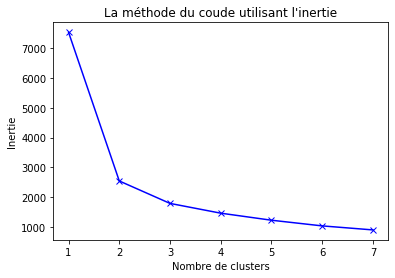

In [5]:
plt.plot(nb_clus,inertia,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("La méthode du coude utilisant l'inertie")
plt.show()

In [6]:
#3/Méthode des K-means
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3,max_iter=20000,n_init=1000)
kmean.fit(MAX_DATA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20000,
       n_clusters=3, n_init=1000, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<function matplotlib.pyplot.show(*args, **kw)>

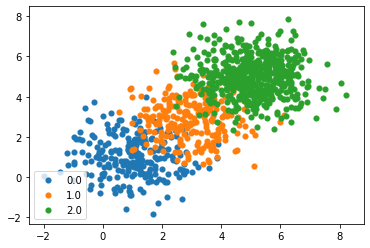

In [7]:
#4/Représentation graphique
import numpy as np

import matplotlib.pyplot as plt

for o in np.unique(labelbase):
    plt.scatter(MAX_DATA[:,0][labelbase==o], MAX_DATA[:, 1][labelbase==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

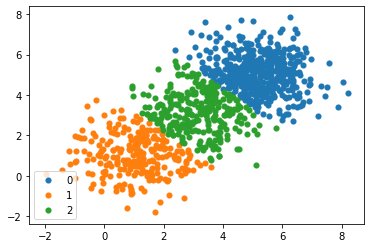

In [8]:
#5/Représentation graphique du pattern des kmeans
Y_pred = kmean.fit_predict(MAX_DATA)

import numpy as np

import matplotlib.pyplot as plt

for o in np.unique(Y_pred):
    plt.scatter(MAX_DATA[:,0][Y_pred==o], MAX_DATA[:, 1][Y_pred==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show

In [17]:
#Exercice données lettres
#1
import matplotlib.pyplot as plt
import os
images = os.listdir("C:/Users/darem/Downloads/imagekmeans")
images = ["C:/Users/darem/Downloads/imagekmeans/"+o for o in images]


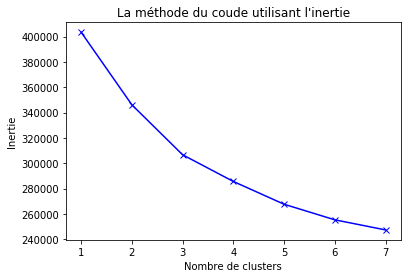

In [25]:
#2
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iml = [plt.imread(o) for o in images]
imlbis = [o.ravel() for o in iml]
imlbis_scale = StandardScaler().fit_transform(imlbis)
inertia = []

nb_clus = range(1,8)
for k in nb_clus:
    kmeanmodel = KMeans(n_clusters=k,max_iter=1000,n_init=50).fit(imlbis)
    inertia.append(kmeanmodel.inertia_)

plt.plot(nb_clus,inertia,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("La méthode du coude utilisant l'inertie")
plt.show()

ValueError: 'c' argument has 2800 elements, which is not acceptable for use with 'x' with size 2800, 'y' with size 2800.

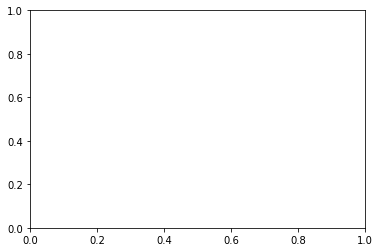